In [72]:
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
# Importacion de bibliotecas

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd
import glob
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import multiprocessing as mp
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb


def displaydf(dataframe, cols = None, rows = 54):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True


In [74]:
# Cargamos fichero con los datos preprocesados
clean_patients = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CleanPatients_1500.csv")
del clean_patients[("Unnamed: 0")] #Borramos columna extra 
del clean_patients[("Unnamed: 0.1")] #Borramos columna extra 

displaydf(clean_patients)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Outcome,IdPaciente
0,95.0,90.5,36.44,121.0,80.0,63.0,17.0,0.0,-3.000000,24.555556,1.0,7.280000,49.000000,77.555556,0.0,11.444444,0.0,7.470000,109.555556,1.044444,0.0,99.000000,2.80000,2.233333,3.900000,4.266667,0.0,0.0,31.850,13.038462,36.911111,7.900000,260.250,126.769231,27.92,1,0.0,0.0,-0.03,13,0,0,0
1,108.0,97.0,37.72,120.0,75.0,59.0,50.0,0.0,1.052632,31.608696,0.4,7.429474,38.368421,78.347826,0.0,17.956522,0.0,7.804348,104.391304,1.300000,0.0,119.043478,1.30000,2.160870,2.573913,3.508696,0.0,0.0,26.560,9.517391,32.121739,10.117391,470.500,89.956522,27.92,1,0.0,0.0,-0.03,71,0,0,0
2,117.0,100.0,38.11,145.0,88.0,67.0,26.0,0.0,1.800000,26.920000,0.4,7.366000,48.400000,98.000000,0.0,20.720000,0.0,7.764000,105.720000,0.900000,0.0,125.080000,0.92963,2.036000,2.512000,3.856250,0.0,0.0,25.796,8.844000,28.550000,8.416000,727.875,249.240000,27.92,1,0.0,0.0,-0.03,142,0,0,0
3,118.0,98.5,38.00,128.5,88.0,113.0,23.5,0.0,2.500000,27.760000,0.4,7.362500,50.500000,98.000000,0.0,20.160000,0.0,7.792000,105.160000,0.900000,0.0,117.240000,0.88642,2.008000,2.736000,3.812500,0.0,0.0,25.488,8.732000,28.300000,8.948000,753.250,281.720000,27.92,1,0.0,0.0,-0.03,149,0,0,0
4,113.0,100.0,37.61,113.5,68.0,61.0,34.0,0.0,3.000000,32.500000,1.0,7.380000,50.000000,97.000000,0.0,18.500000,0.0,8.175000,103.500000,0.825000,0.0,142.000000,2.10000,1.850000,3.550000,3.900000,0.0,0.0,27.000,8.900000,30.650000,10.475000,477.500,189.000000,27.92,1,0.0,0.0,-0.03,166,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,95.0,100.0,38.44,131.0,77.0,54.0,28.0,0.0,-1.000000,21.500000,0.4,7.490000,25.000000,0.000000,25.0,38.000000,132.0,8.369231,106.500000,1.323077,0.0,208.538462,0.90000,2.500000,3.346154,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,166,1,1,23
1724,96.0,100.0,38.72,135.0,77.0,54.0,29.0,0.0,-1.000000,21.333333,0.4,7.490000,25.500000,0.000000,25.0,38.333333,132.0,8.346154,106.666667,1.315385,0.0,219.692308,0.90000,2.500000,3.330769,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,167,1,1,23
1725,97.0,100.0,38.72,140.0,81.0,56.0,25.5,0.0,-0.666667,21.166667,0.4,7.490000,26.000000,0.000000,25.0,38.666667,132.0,8.323077,106.833333,1.307692,0.0,230.846154,0.90000,2.500000,3.315385,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,168,1,1,23
1726,98.0,100.0,38.72,155.0,95.0,66.0,26.5,0.0,-0.333333,21.000000,0.4,7.490000,26.500000,0.000000,25.0,39.000000,132.0,8.300000,107.000000,1.300000,0.0,242.000000,0.90000,2.500000,3.300000,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,169,1,1,23


True

In [75]:
# Visualizamos fichero

displaydf(clean_patients)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Outcome,IdPaciente
0,95.0,90.5,36.44,121.0,80.0,63.0,17.0,0.0,-3.000000,24.555556,1.0,7.280000,49.000000,77.555556,0.0,11.444444,0.0,7.470000,109.555556,1.044444,0.0,99.000000,2.80000,2.233333,3.900000,4.266667,0.0,0.0,31.850,13.038462,36.911111,7.900000,260.250,126.769231,27.92,1,0.0,0.0,-0.03,13,0,0,0
1,108.0,97.0,37.72,120.0,75.0,59.0,50.0,0.0,1.052632,31.608696,0.4,7.429474,38.368421,78.347826,0.0,17.956522,0.0,7.804348,104.391304,1.300000,0.0,119.043478,1.30000,2.160870,2.573913,3.508696,0.0,0.0,26.560,9.517391,32.121739,10.117391,470.500,89.956522,27.92,1,0.0,0.0,-0.03,71,0,0,0
2,117.0,100.0,38.11,145.0,88.0,67.0,26.0,0.0,1.800000,26.920000,0.4,7.366000,48.400000,98.000000,0.0,20.720000,0.0,7.764000,105.720000,0.900000,0.0,125.080000,0.92963,2.036000,2.512000,3.856250,0.0,0.0,25.796,8.844000,28.550000,8.416000,727.875,249.240000,27.92,1,0.0,0.0,-0.03,142,0,0,0
3,118.0,98.5,38.00,128.5,88.0,113.0,23.5,0.0,2.500000,27.760000,0.4,7.362500,50.500000,98.000000,0.0,20.160000,0.0,7.792000,105.160000,0.900000,0.0,117.240000,0.88642,2.008000,2.736000,3.812500,0.0,0.0,25.488,8.732000,28.300000,8.948000,753.250,281.720000,27.92,1,0.0,0.0,-0.03,149,0,0,0
4,113.0,100.0,37.61,113.5,68.0,61.0,34.0,0.0,3.000000,32.500000,1.0,7.380000,50.000000,97.000000,0.0,18.500000,0.0,8.175000,103.500000,0.825000,0.0,142.000000,2.10000,1.850000,3.550000,3.900000,0.0,0.0,27.000,8.900000,30.650000,10.475000,477.500,189.000000,27.92,1,0.0,0.0,-0.03,166,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,95.0,100.0,38.44,131.0,77.0,54.0,28.0,0.0,-1.000000,21.500000,0.4,7.490000,25.000000,0.000000,25.0,38.000000,132.0,8.369231,106.500000,1.323077,0.0,208.538462,0.90000,2.500000,3.346154,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,166,1,1,23
1724,96.0,100.0,38.72,135.0,77.0,54.0,29.0,0.0,-1.000000,21.333333,0.4,7.490000,25.500000,0.000000,25.0,38.333333,132.0,8.346154,106.666667,1.315385,0.0,219.692308,0.90000,2.500000,3.330769,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,167,1,1,23
1725,97.0,100.0,38.72,140.0,81.0,56.0,25.5,0.0,-0.666667,21.166667,0.4,7.490000,26.000000,0.000000,25.0,38.666667,132.0,8.323077,106.833333,1.307692,0.0,230.846154,0.90000,2.500000,3.315385,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,168,1,1,23
1726,98.0,100.0,38.72,155.0,95.0,66.0,26.5,0.0,-0.333333,21.000000,0.4,7.490000,26.500000,0.000000,25.0,39.000000,132.0,8.300000,107.000000,1.300000,0.0,242.000000,0.90000,2.500000,3.300000,3.800000,1.0,0.0,26.700,9.100000,27.200000,11.500000,191.000,242.000000,74.65,1,0.0,0.0,-0.02,169,1,1,23


True

# División en conjuntos train y test de los datos 

In [0]:
# Dividimos entre las variables que consideramos entradas y la salida

X = clean_patients[["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender","HospAdmTime","ICULOS", "IdPaciente"]]

y = clean_patients[["Outcome"]]
Sepsis=clean_patients[["SepsisLabel"]]

In [0]:
split_train_len=int(0.75*len(X)) #75% conjunto train

X_train=X.iloc[0:split_train_len,:]
X_test=X.iloc[split_train_len:,:]
y_train=y.iloc[0:split_train_len,:]
y_test=y.iloc[split_train_len:,:]

Sepsis_test=Sepsis.iloc[split_train_len:,:]

# Estandarización de los datos

In [0]:
scaler = preprocessing.StandardScaler().fit(X_train) #Estandarizamos los subconjuntos teniendo en cuenta que para el test usaremos la media y desviación tipica de train 

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train_transformed_no_scaled_id=pd.DataFrame(X_train_scaler, columns=["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender","HospAdmTime", "ICULOS", "IdPaciente"])

X_test_transformed_no_scaled_id=pd.DataFrame(X_test_scaler, columns=["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender","HospAdmTime", "ICULOS", "IdPaciente"])


#Para evitar normalización de IdPaciente
X_train_transformed_no_id=X_train_transformed_no_scaled_id.iloc[:,0:38] #Incluimos las columnas estandarizadas salvo IdPaciente
X_train_id=X_train["IdPaciente"] #La guardamos aparte sin normalizar
X_train_transformed=X_train_transformed_no_id.join(X_train_id) #Juntamos las variables normalizadas más el IdPaciente original

X_test_transformed_no_id=X_test_transformed_no_scaled_id.iloc[:,0:38]
X_test_id=X_train["IdPaciente"]
X_test_transformed=X_test_transformed_no_id.join(X_train_id)

In [79]:
print(len(X_test_transformed))

432


# MODELOS

## **1. KNN**

> - Búsqueda de parámetros óptimos -> K
- Construcción del modelo
- Evaluación de prestaciones
- Representación del outcome



### Búsqueda de K 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

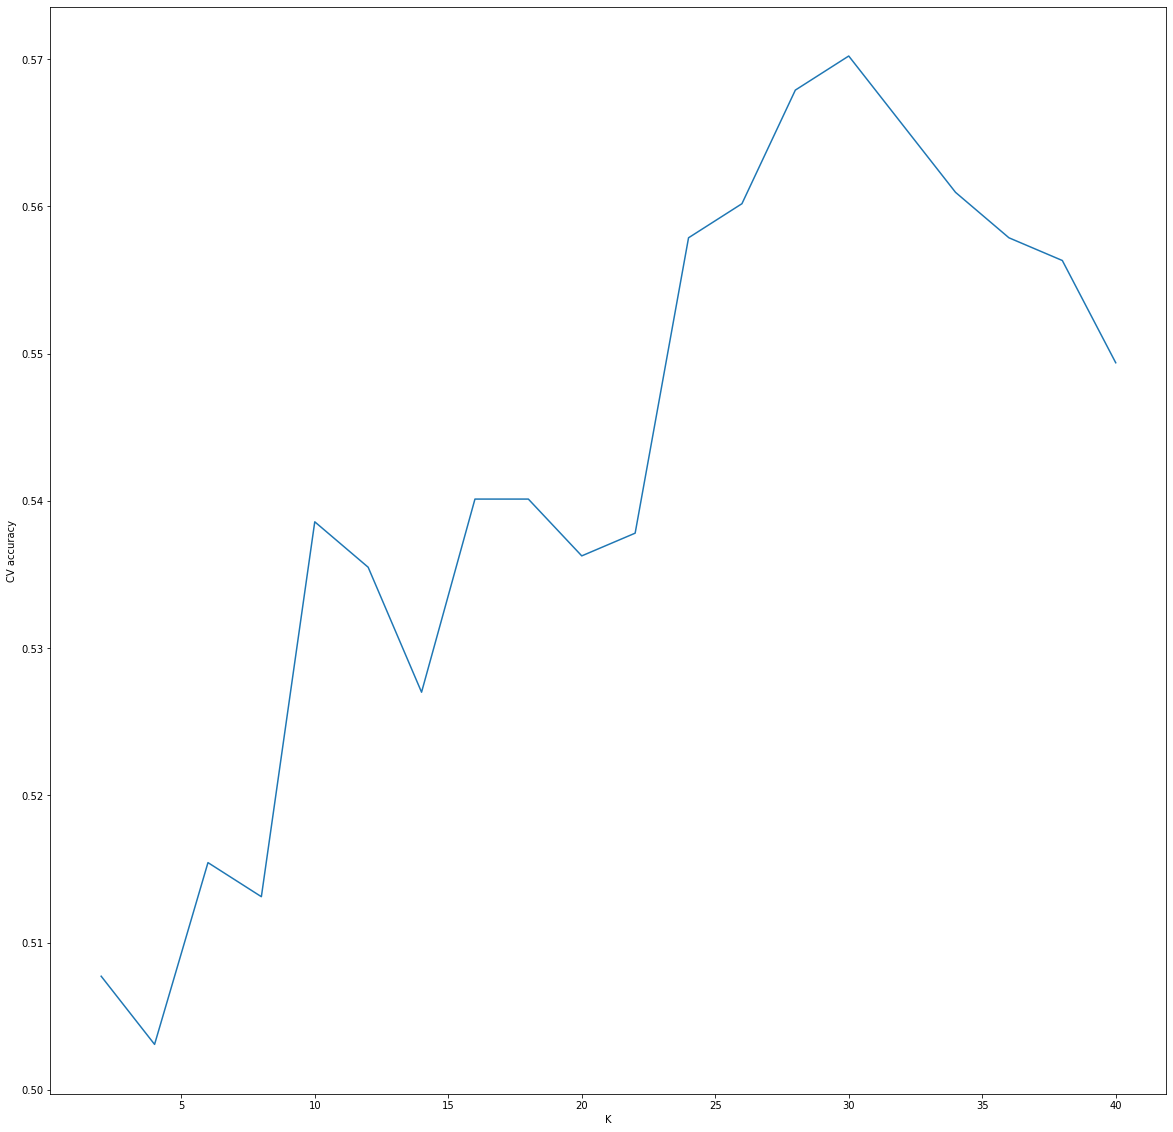

El parámetro k óptimo es: 30


In [0]:
kf = KFold(n_splits=int(len(X_train_transformed)/24)) #Numero de splits: numero de pacientes
k_values = range(2,42,2) #Valores de K a explorar
cv_k_scores=[]

for f in k_values:
    neigh = KNeighborsClassifier(n_neighbors=f)
    scores = cross_val_score(neigh, X_train_transformed, y_train, cv=kf)
    cv_k_scores.append(scores.mean())

plt.plot(k_values, cv_k_scores)
plt.xlabel('K')
plt.ylabel('CV accuracy')
plt.show()

param_k = np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())]
print('El parámetro k óptimo es:',param_k)

### Construcción del modelo K vecinos

In [0]:
#Generamos el modelo
model_kneigh = KNeighborsClassifier(n_neighbors=param_k)
model_kneigh.fit(X_train_transformed, y_train)
pred_model_kneigh = model_kneigh.predict(X_test_transformed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### Evaluación de prestaciones

In [0]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_model_kneigh)
print(confusion_matrix)

[[134  82]
 [147  69]]


In [0]:
#Evaluamos las prestaciones de nuestro clasificador con los datos estandarizados
VN, FP, FN, VP = confusion_matrix.ravel()
VN = float(VN)
FP = float(FP)
FN = float(FN)
VP = float(VP)

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP / (VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

La tasa de acierto del test es de: 0.4699074074074074
La sensibilidad del test es de: 0.3194444444444444
La especificidad de acierto es de: 0.6203703703703703


### Visualización Outcome



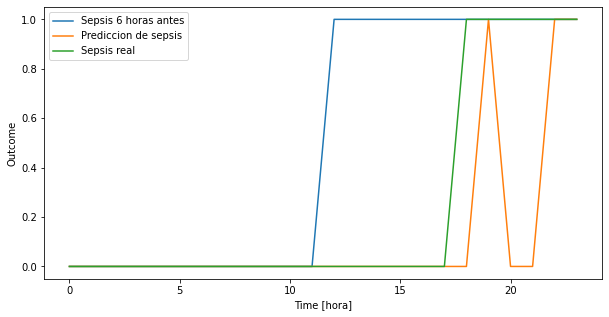

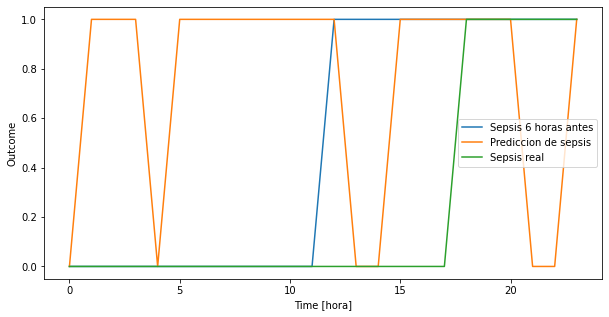

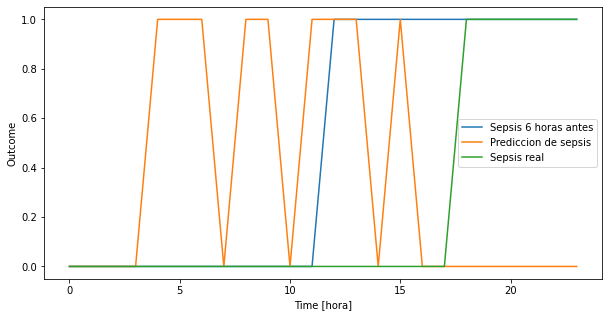

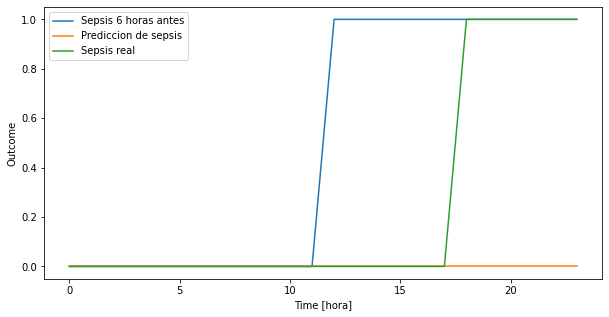

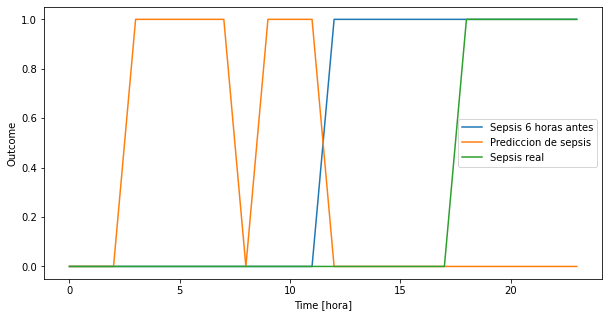

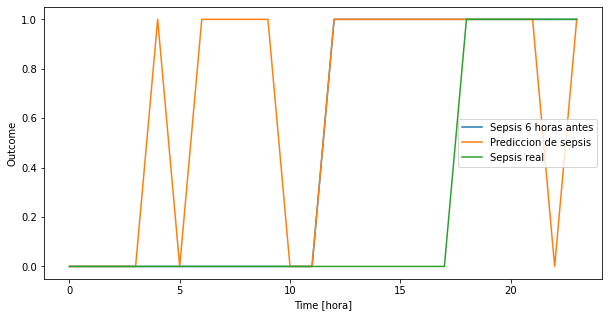

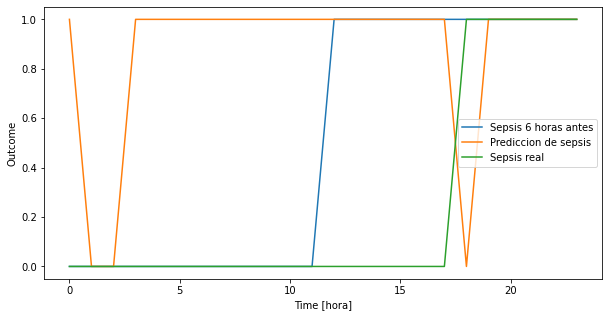

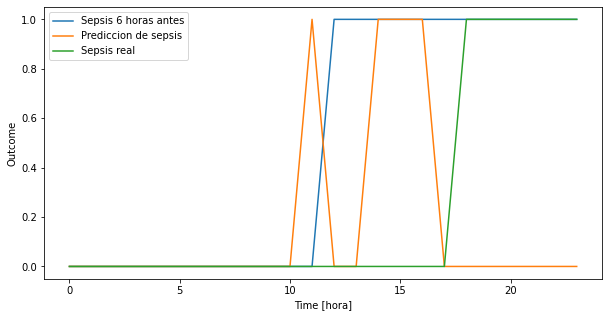

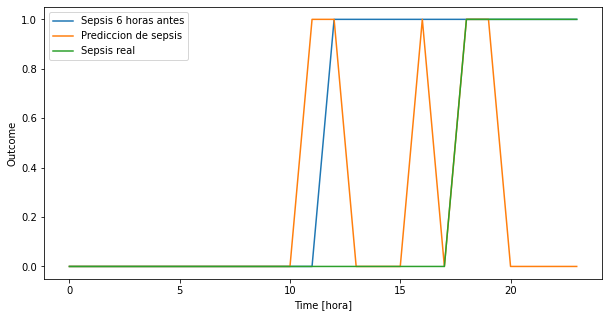

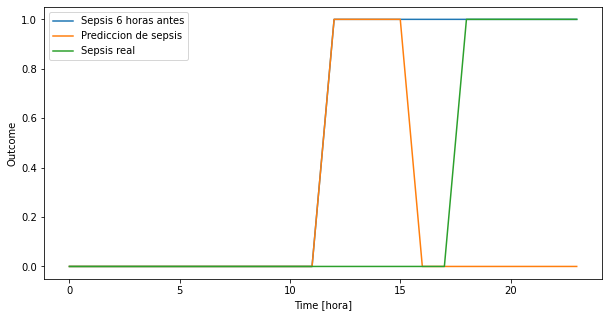

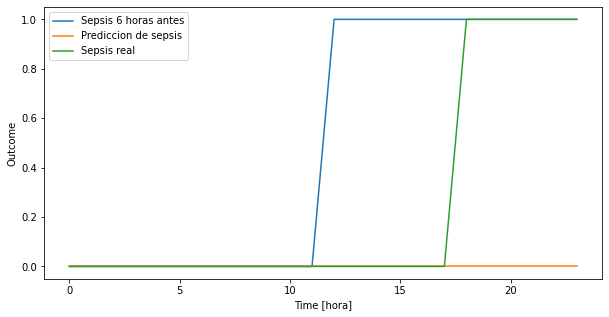

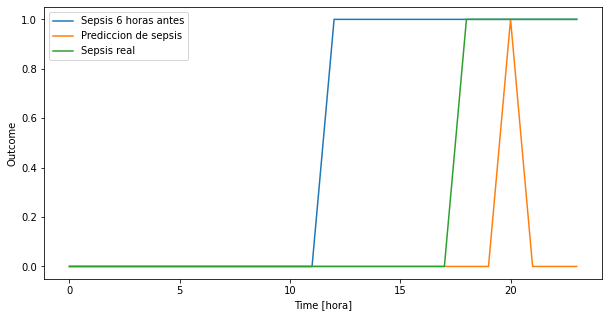

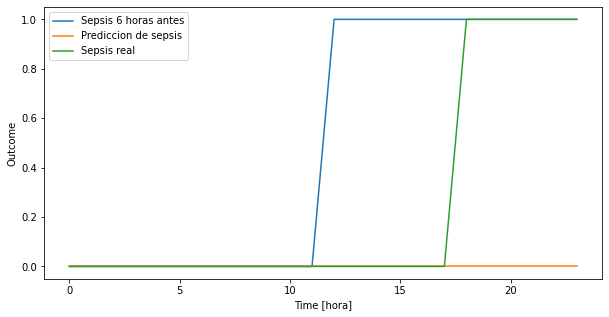

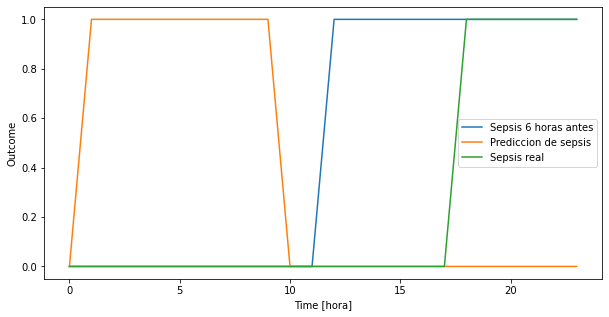

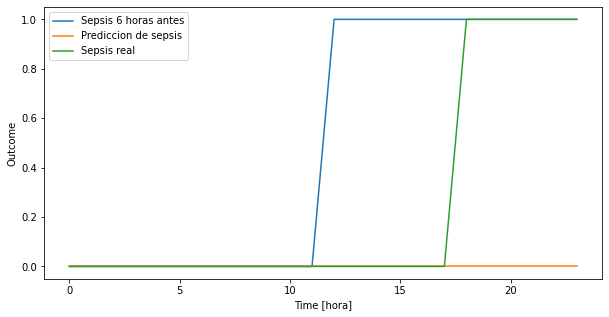

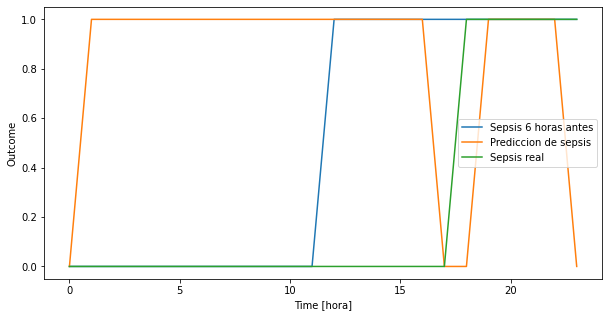

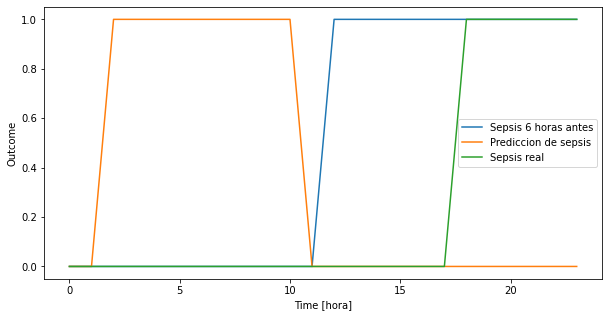

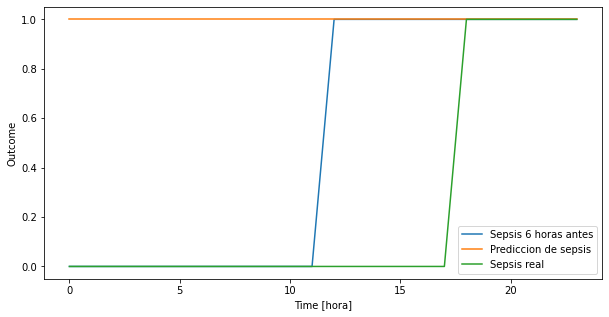

In [0]:
a=-24
b=0
for i in range(int(len(X_test_transformed)/24)):
    a+=24
    b+=24
    paciente_real=y_test[a:b]
    paciente_predicted=pred_model_kneigh[a:b]
    paciente_sepsis=Sepsis_test[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
    plt.plot(t,paciente_real, label="Sepsis 6 horas antes")
    plt.plot(t,paciente_predicted, label="Prediccion de sepsis")
    plt.plot(t,paciente_sepsis, label= "Sepsis real")
    plt.xlabel('Time [hora]')
    plt.ylabel('Outcome')
    plt.legend()


## **2. Random Forest**

> - Búsqueda de parámetros óptimos -> max depth, min samples leaf y n estimators
- Construcción del modelo
- Evaluación de prestaciones
- Representación del outcome

### Búsqueda de max depth y min samples leaf



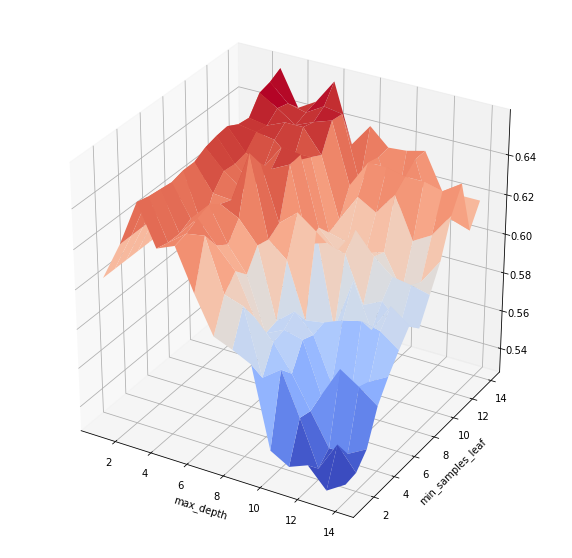

In [0]:
#Rango de valores que vamos a probar
max_depth = np.arange(1,15)
min_samples_leaf = np.arange(1,15)
kf = KFold(n_splits=int(len(X_train_transformed)/216))

cv_tree_scores=[]

for f in max_depth:
    for w in min_samples_leaf:
        model_tree1 = RandomForestClassifier(max_depth=f, min_samples_leaf=w,bootstrap = False, random_state = 1)
        scores = cross_val_score(model_tree1, X_train_transformed, y_train, cv=kf, n_jobs = -1)
        cv_tree_scores.append(scores.mean())

#Representamos el Negative Mean Absolute Error para los diferentes valores de los parámetros libres max_depth y min_samples_leaf
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
Z1 = np.reshape(np.array(cv_tree_scores),(max_depth.shape[0],min_samples_leaf.shape[0]))
X, Y = np.meshgrid(max_depth, min_samples_leaf)
ax.plot_surface(Y, X, Z1, cmap=cm.coolwarm)
plt.ylabel('min_samples_leaf')
plt.xlabel('max_depth')
plt.show()

In [0]:
# Buscamos parametros con GridSearch
params_tree_grid = {'max_depth': np.arange(1,15),'min_samples_leaf': np.arange(1,15)}
model_tree_grid = GridSearchCV(RandomForestClassifier(bootstrap=False, random_state = 1), params_tree_grid, cv=kf, n_jobs=-1)
model_tree_grid.fit(X_train_transformed, y_train)
pred_model_tree_grid = model_tree_grid.predict(X_test_transformed)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [0]:
best_params_tree = model_tree_grid.best_params_
print("Los parametros optimos son:",best_params_tree)

Los parametros optimos son: {'max_depth': 3, 'min_samples_leaf': 14}


### Búsqueda de n estimators

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

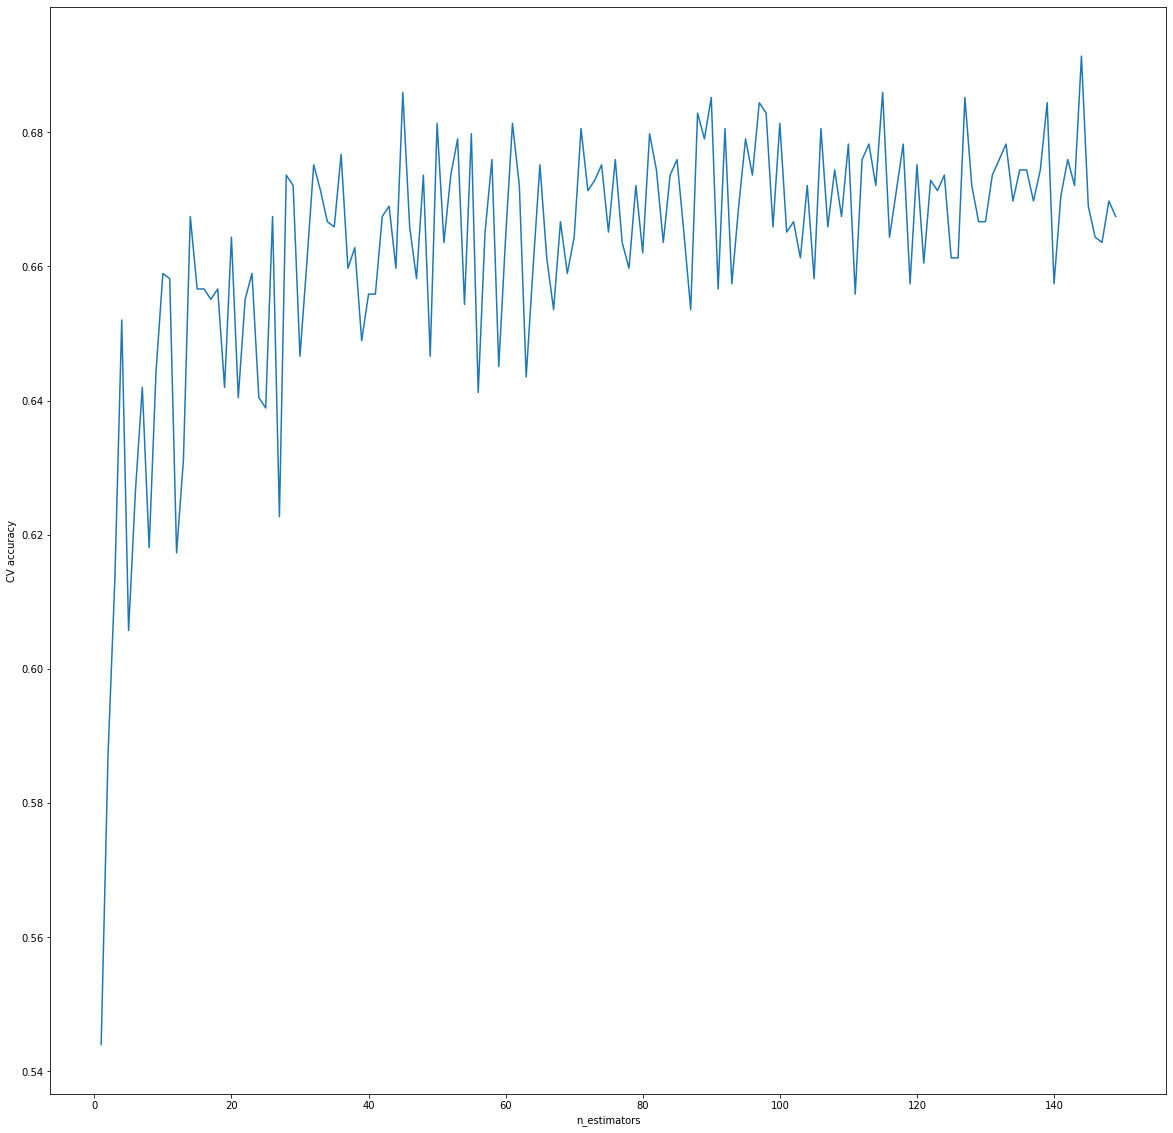

El parámetro n_estimators óptimo es: 144


In [81]:
kf = KFold(n_splits=int(len(X_train_transformed)/216))
n_values = range(1,150) #Rango que exploramos
cv_n_scores=[]

for f in n_values:
    model_tree2 = RandomForestClassifier(n_estimators = f, max_depth = best_params_tree['max_depth'] , min_samples_leaf = best_params_tree['min_samples_leaf'])
    scores = cross_val_score(model_tree2, X_train_transformed, y_train, cv=kf)
    cv_n_scores.append(scores.mean())

plt.plot(n_values, cv_n_scores)
plt.xlabel('n_estimators')
plt.ylabel('CV accuracy')
plt.show()

param_n_estimators = np.array(n_values)[cv_n_scores.index(np.array(cv_n_scores).max())]
print('El parámetro n_estimators óptimo es:',param_n_estimators)

### Construcción del modelo Random Forest

In [0]:
#Generamos modelo
model_forest = RandomForestClassifier(max_depth=best_params_tree['max_depth'], min_samples_leaf = best_params_tree['min_samples_leaf'], n_estimators= param_n_estimators, bootstrap=False)

In [85]:
model_forest.fit(X_train_transformed, y_train)
pred_model_forest = model_forest.predict(X_test_transformed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


### Evaluación de prestaciones 





In [86]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_model_forest)
print(confusion_matrix)


[[146  70]
 [ 57 159]]


In [87]:
#Evaluamos las prestaciones de nuestro clasificador con los datos estandarizados
VN, FP, FN, VP = confusion_matrix.ravel()
VN = float(VN)
FP = float(FP)
FN = float(FN)
VP = float(VP)

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP / (VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

La tasa de acierto del test es de: 0.7060185185185185
La sensibilidad del test es de: 0.7361111111111112
La especificidad de acierto es de: 0.6759259259259259


### Visualización Outcome

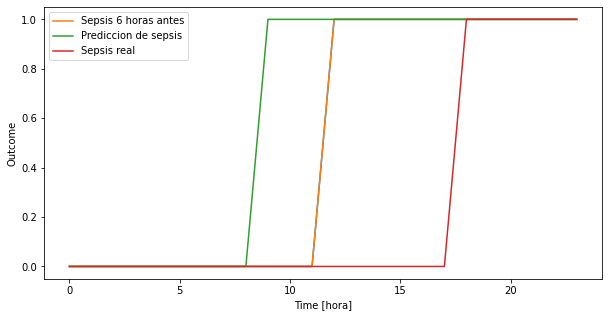

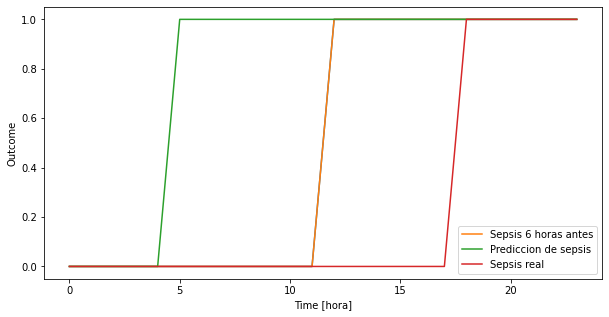

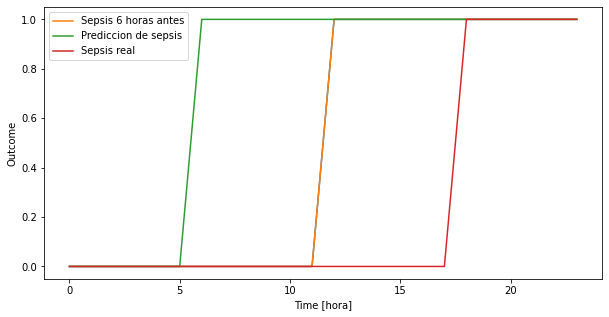

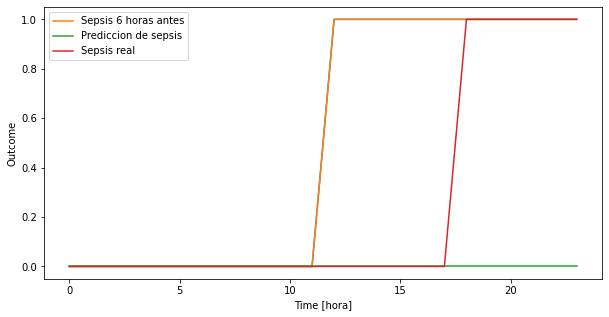

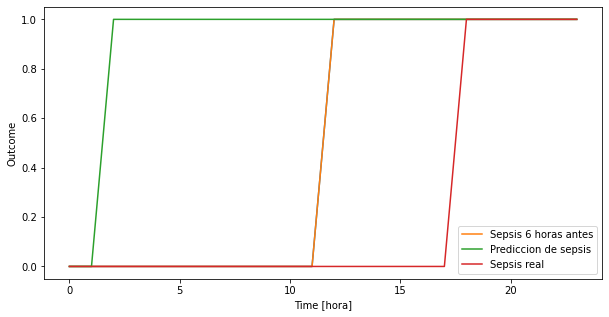

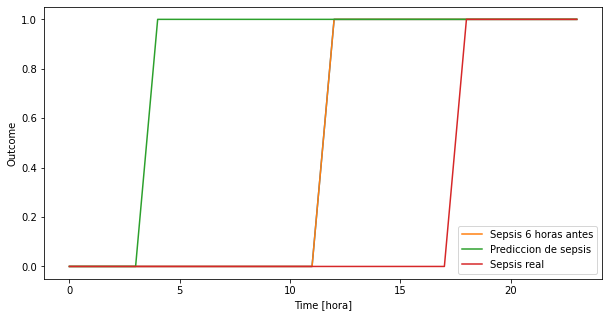

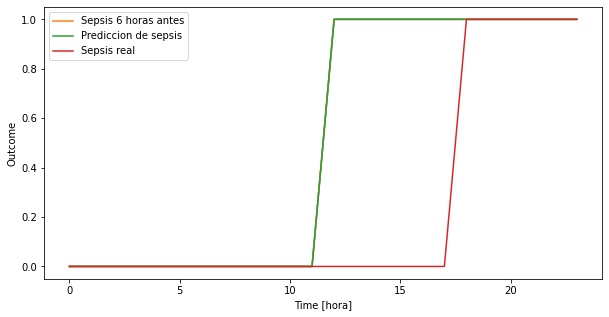

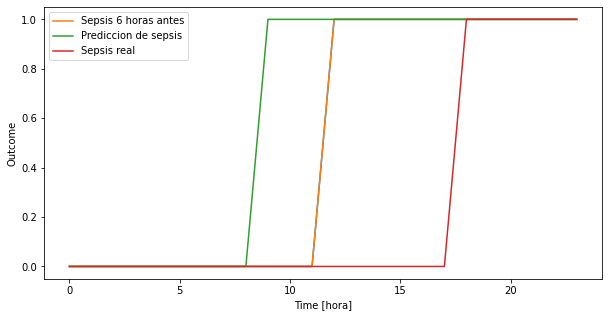

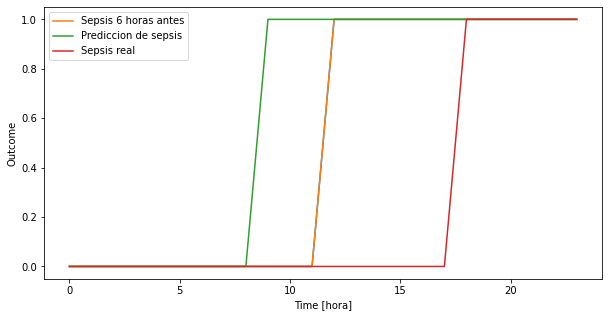

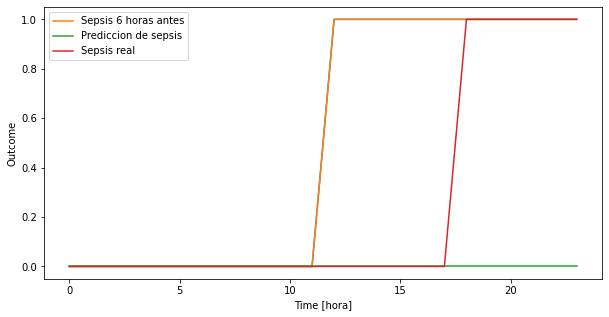

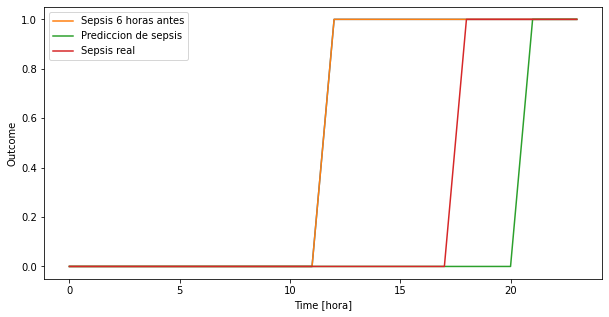

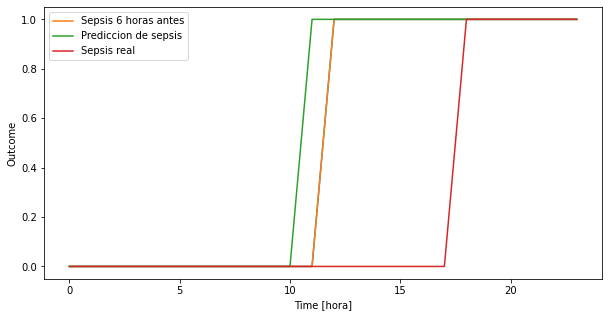

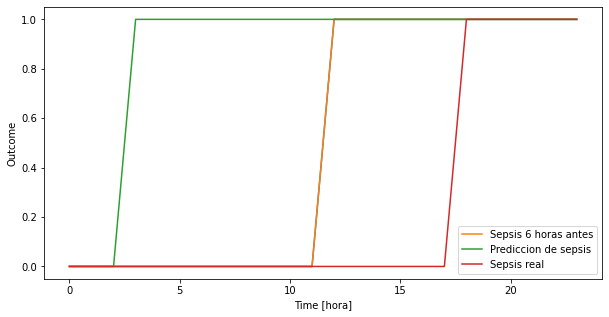

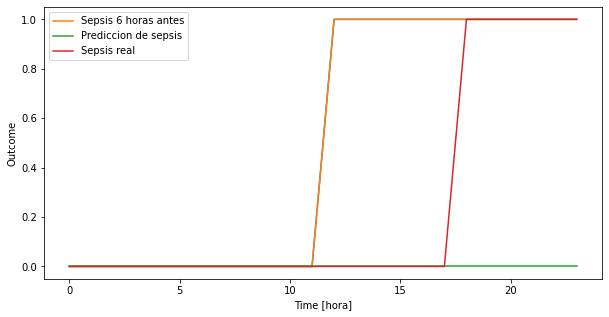

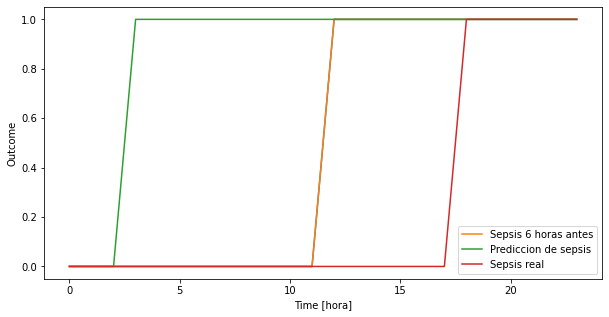

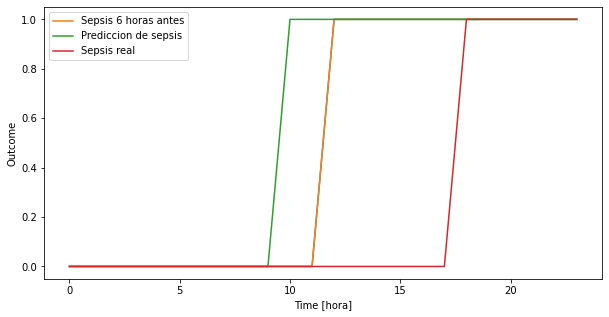

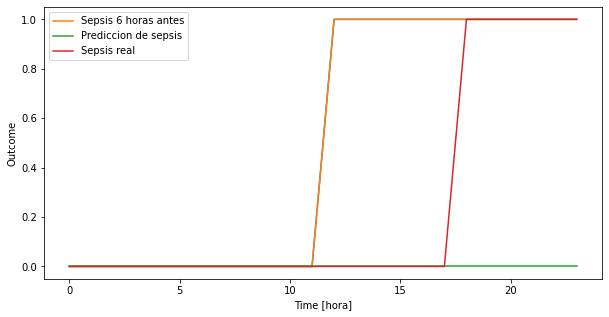

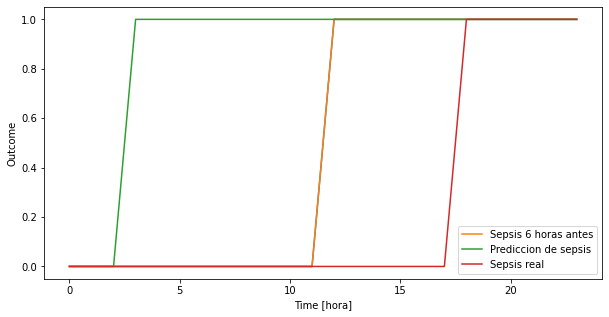

In [88]:
a=-24
b=0
for i in range(int(len(X_test_transformed)/24)):
    a+=24
    b+=24
    paciente_real=y_test[a:b]
    paciente_predicted=pred_model_forest[a:b]
    paciente_sepsis=Sepsis_test[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
    plt.plot(t,paciente_real)
    plt.plot(t,paciente_real, label="Sepsis 6 horas antes")
    plt.plot(t,paciente_predicted, label="Prediccion de sepsis")
    plt.plot(t,paciente_sepsis, label= "Sepsis real")
    plt.xlabel('Time [hora]')
    plt.ylabel('Outcome')
    plt.legend()

## **3. Perceptrón Multicapa**

> - Búsqueda de parámetros óptimos -> número de capas y neuronas en cada una
- Construcción del modelo
- Evaluación de prestaciones
- Representación del outcome

### Búsqueda de número de capas ocultas 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

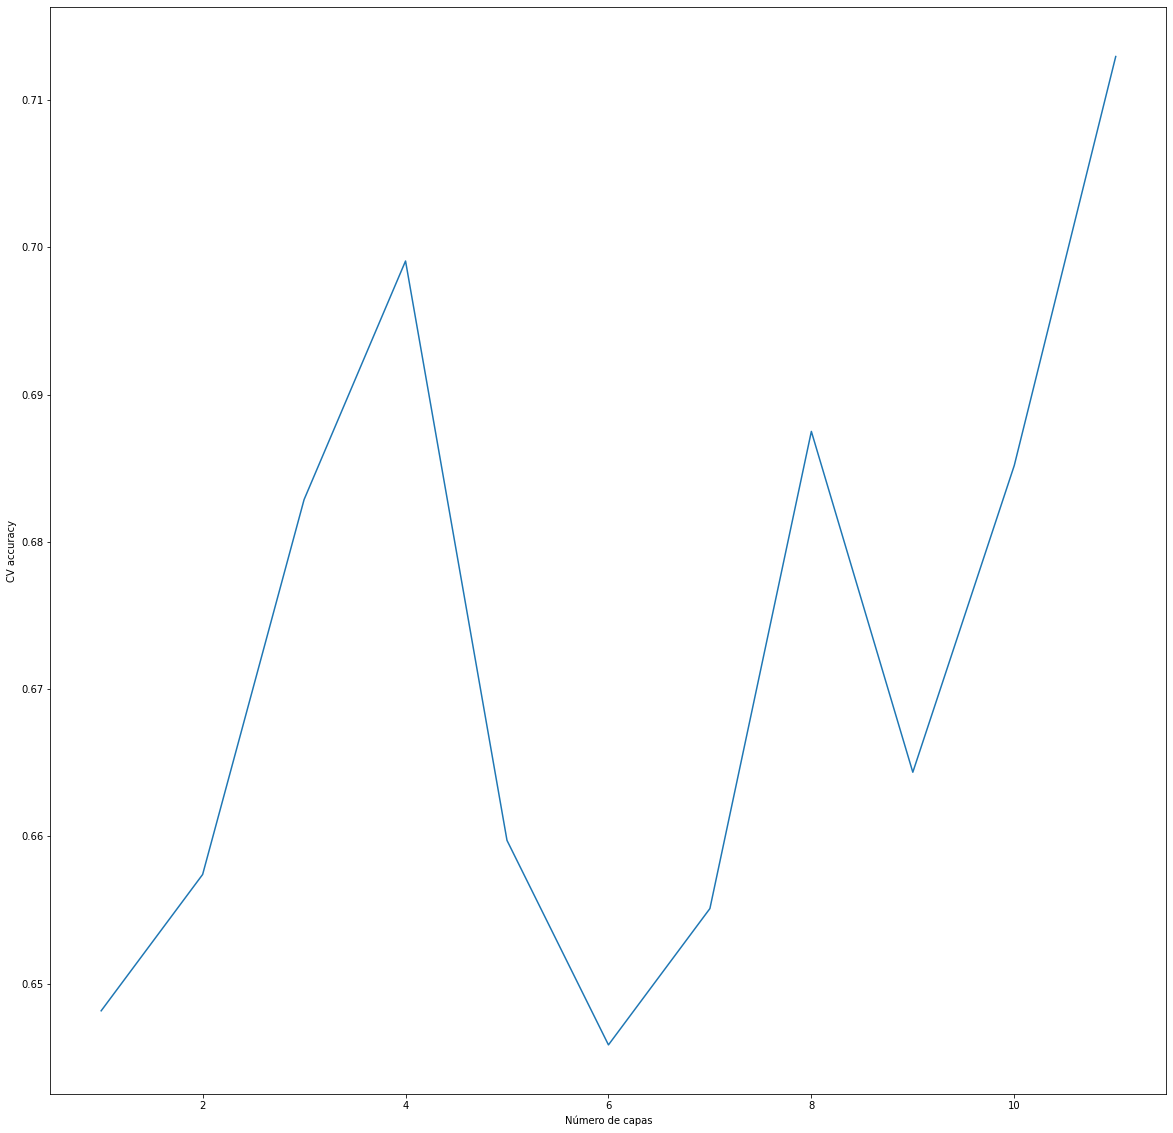

La posición más óptima es: 50


In [89]:
hidden_layer = [(50,50,10,50),(100,100,100),(100,50,100),(50,50,50), (50,20,20),(250,100),(50,150),(100,100),(300),(100),(50),]
posicion = np.arange(1,12)
cv_layer_scores=[]
for f in hidden_layer:
    model_mlp1 = MLPClassifier(f, random_state = 0, activation = "logistic", learning_rate = 'adaptive', batch_size = 24, shuffle = False)
    model_mlp1.fit(X_train_transformed, y_train)
    scores = model_mlp1.score(X_test_transformed, y_test)
    cv_layer_scores.append(scores.mean())

plt.plot(posicion, cv_layer_scores)
plt.xlabel('Número de capas')
plt.ylabel('CV accuracy')
plt.show()

n_layers = np.array(hidden_layer)[cv_layer_scores.index(np.array(cv_layer_scores).max())]
print('La posición más óptima es:',n_layers)

### Búsqueda número de neuronas en capa oculta

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

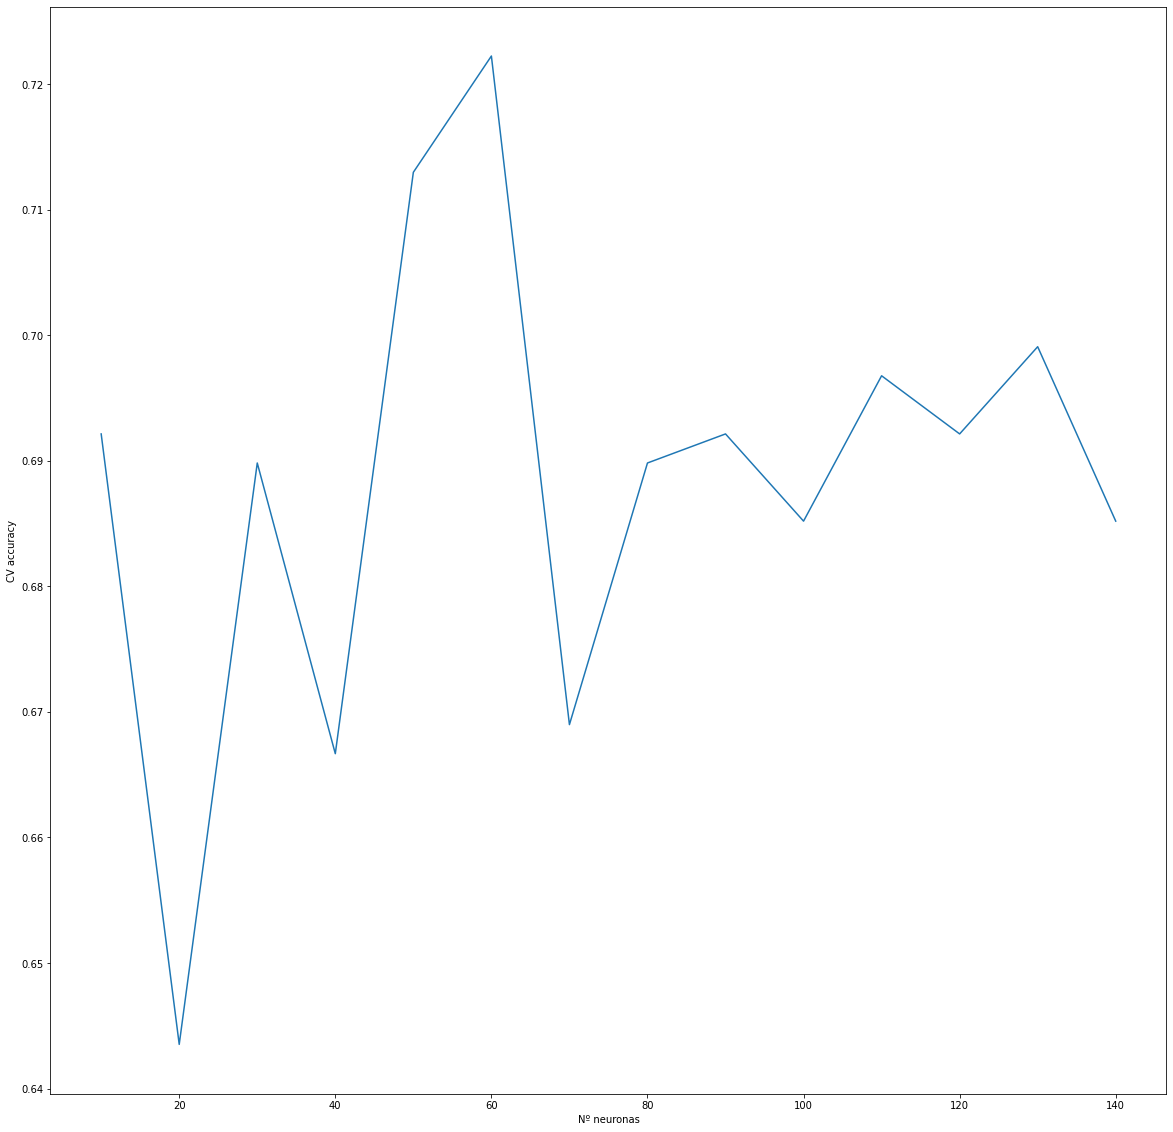

El número de neuronas óptimo es: 60


In [90]:
hidden_layer = np.arange(10,150,10)
cv_layer_scores=[]
for f in hidden_layer:
    model_mlp2 = MLPClassifier(f, random_state = 0, activation = "logistic", learning_rate = 'adaptive', batch_size = 24, shuffle = False)
    model_mlp2.fit(X_train_transformed, y_train)
    scores = model_mlp2.score(X_test_transformed, y_test)
    cv_layer_scores.append(scores.mean())

plt.plot(hidden_layer, cv_layer_scores)
plt.xlabel('Nº neuronas')
plt.ylabel('CV accuracy')
plt.show()

n_neurons = np.array(hidden_layer)[cv_layer_scores.index(np.array(cv_layer_scores).max())]
print('El número de neuronas óptimo es:',n_neurons)

### Construcción del modelo MLP

In [91]:
model_mlp = MLPClassifier((n_neurons), random_state = 0, activation = "logistic", learning_rate = 'adaptive', batch_size = 24, shuffle = False)
model_mlp.fit(X_train_transformed, y_train)
pred_model_mlp = model_mlp.predict(X_test_transformed)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Evaluación prestaciones

In [92]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_model_mlp)
print(confusion_matrix)

[[149  67]
 [ 53 163]]


In [93]:
#Evaluamos las prestaciones de nuestro clasificador con los datos estandarizados
VN, FP, FN, VP = confusion_matrix.ravel()
VN = float(VN)
FP = float(FP)
FN = float(FN)
VP = float(VP)

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP / (VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

La tasa de acierto del test es de: 0.7222222222222222
La sensibilidad del test es de: 0.7546296296296297
La especificidad de acierto es de: 0.6898148148148148


### Visualización Outcome

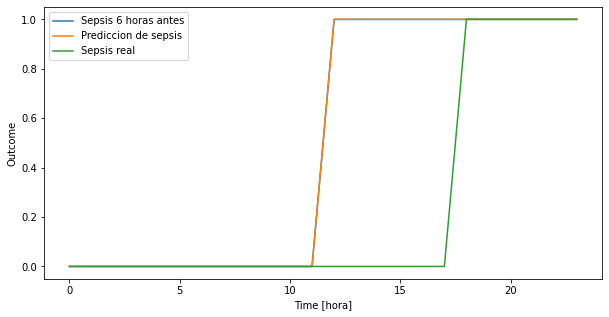

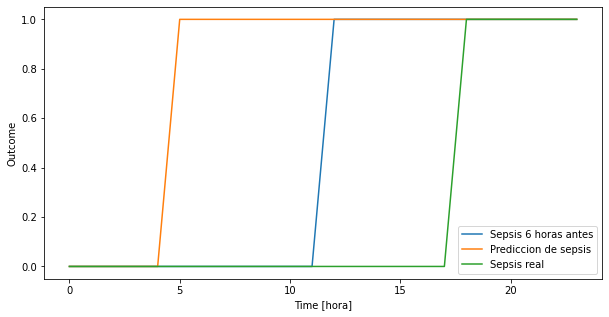

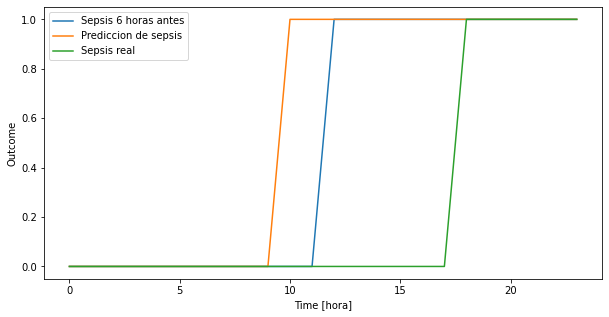

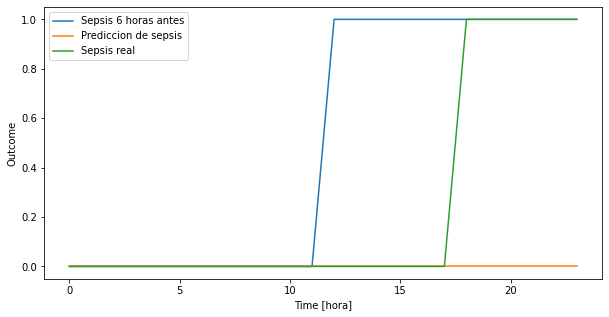

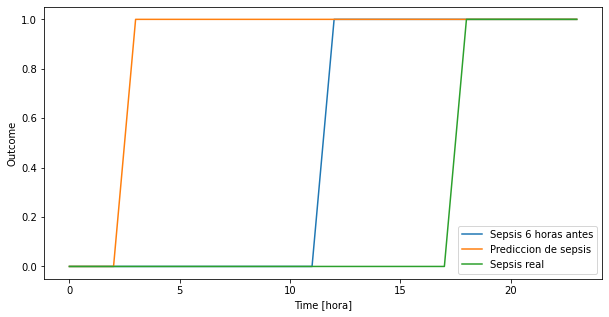

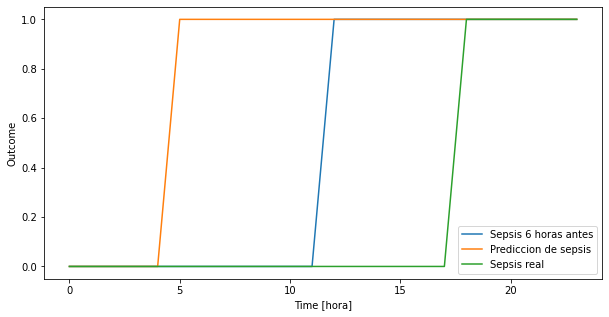

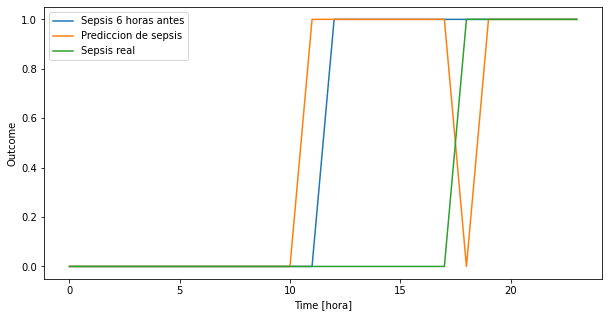

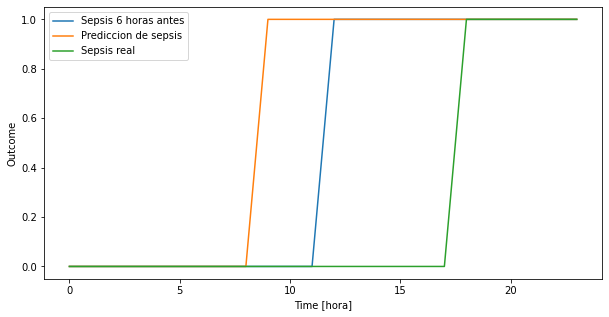

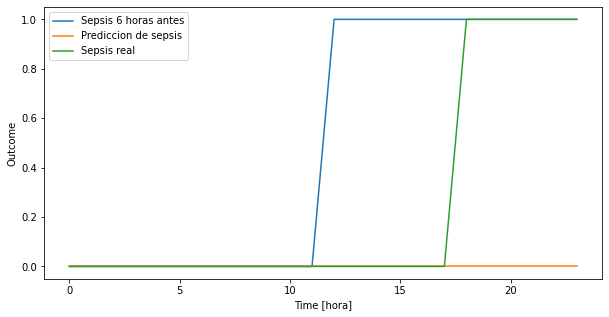

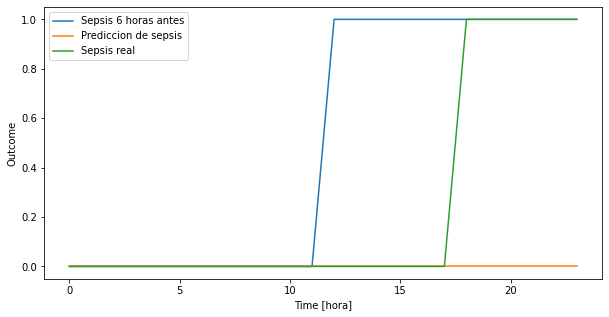

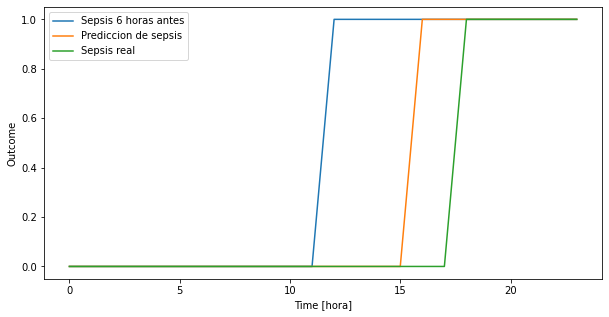

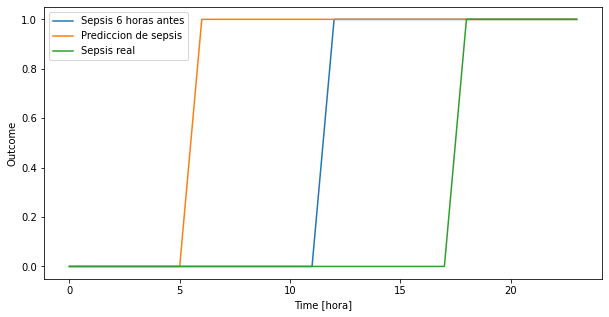

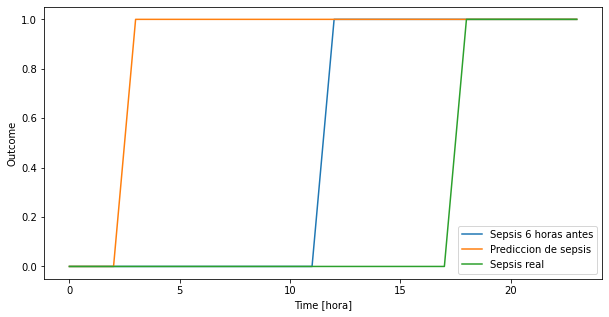

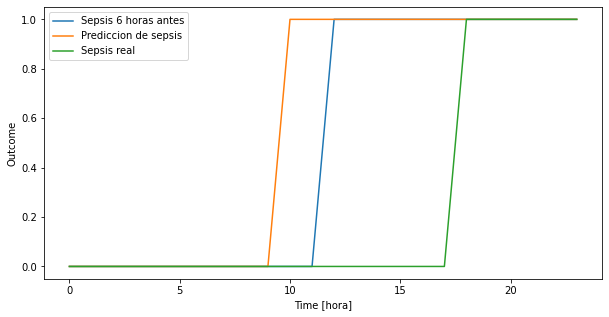

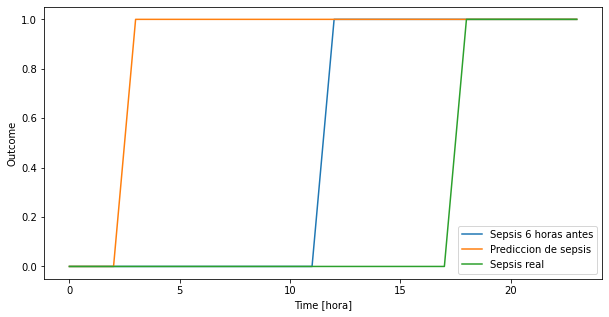

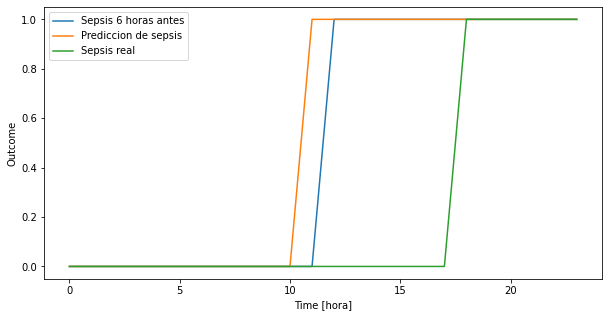

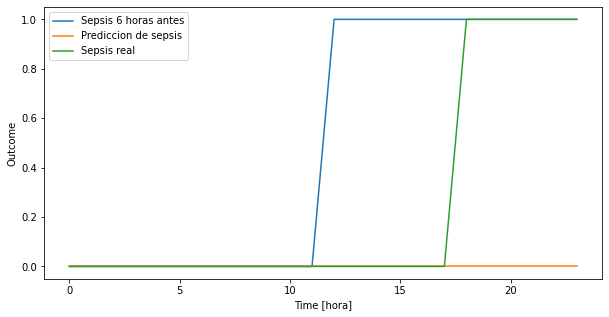

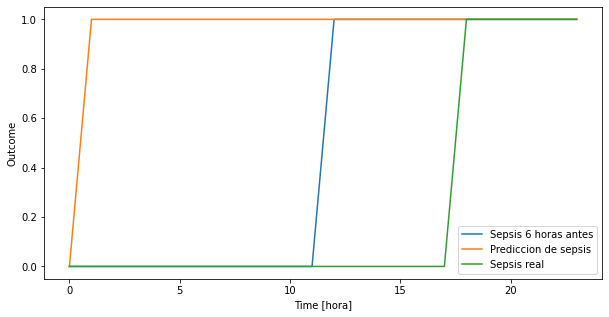

In [94]:
a=-24
b=0
for i in range(int(len(X_test_transformed)/24)):
    a+=24
    b+=24
    paciente_real=y_test[a:b]
    paciente_predicted=pred_model_mlp[a:b]
    paciente_sepsis=Sepsis_test[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
    plt.plot(t,paciente_real, label="Sepsis 6 horas antes")
    plt.plot(t,paciente_predicted, label="Prediccion de sepsis")
    plt.plot(t,paciente_sepsis, label= "Sepsis real")
    plt.xlabel('Time [hora]')
    plt.ylabel('Outcome')
    plt.legend()

## **4. Support Vector Machine**

> - Búsqueda de parámetros óptimos -> C y gamma
- Construcción del modelo
- Evaluación de prestaciones
- Representación del outcome

### Búsqueda de C y gamma

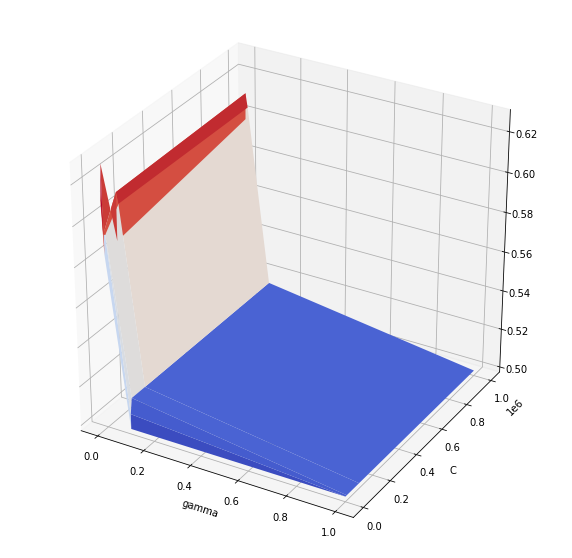

In [95]:
C = np.array([1,100,10000,100000,1000000])
gamma = np.array([0.0001,0.001,0.01,0.1,1])
kf = KFold(n_splits=int(len(X_train_transformed)/216))
cv_svm_scores=[]
for f in gamma:
    for w in C:
        model_svm1 = SVC(C=w, kernel='rbf',gamma=f,random_state = 1)
        scores = cross_val_score(model_svm1, X_train_transformed, y_train, cv= kf, n_jobs = -1)
        cv_svm_scores.append(scores.mean())

#Representamos el Negative Mean Absolute Error para los diferentes valores de los parámetros libres max_depth y min_samples_leaf
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
Z1 = np.reshape(np.array(cv_svm_scores),(C.shape[0],gamma.shape[0]))
X, Y = np.meshgrid(C,gamma)
ax.plot_surface(Y, X, Z1, cmap=cm.coolwarm)
plt.ylabel('C')
plt.xlabel('gamma')
plt.show()

In [96]:
#Calculamos los parámetros óptimos mediante GridSeach
param_svm_grid = {'C':[1,100,10000,100000,1000000],'gamma':[0.0001,0.001,0.01,0.1,1]}
model_svm_grid = GridSearchCV(SVC(kernel='rbf'), param_svm_grid, cv= kf, n_jobs=-1)
model_svm_grid.fit(X_train_transformed, y_train)
pred_model_svm_grid = model_svm_grid.predict(X_test_transformed)
params_svm_grid=model_svm_grid.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
print(params_svm_grid)

{'C': 10000, 'gamma': 0.0001}


### Construcción del modelo SVM

In [98]:
model_svm2 = SVC(C=params_svm_grid['C'], kernel='rbf',gamma=params_svm_grid['gamma'])
model_svm2.fit(X_train_transformed, y_train)
pred_model_svm = model_svm2.predict(X_test_transformed)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluación de prestaciones

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_model_svm)
print(confusion_matrix)

[[121  95]
 [ 61 155]]


In [100]:
#Evaluamos las prestaciones de nuestro clasificador
VN, FP, FN, VP = confusion_matrix.ravel()

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP /(VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad del test es de:",specificity)

La tasa de acierto del test es de: 0.6388888888888888
La sensibilidad del test es de: 0.7175925925925926
La especificidad del test es de: 0.5601851851851852


### Visualización Outcome

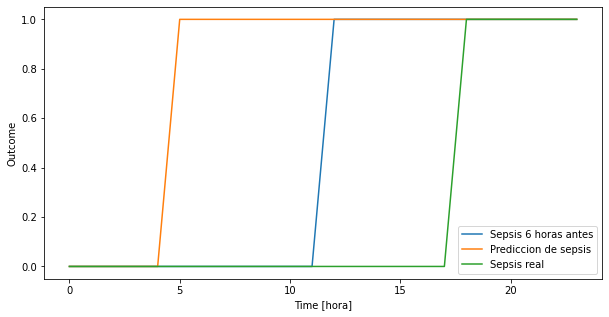

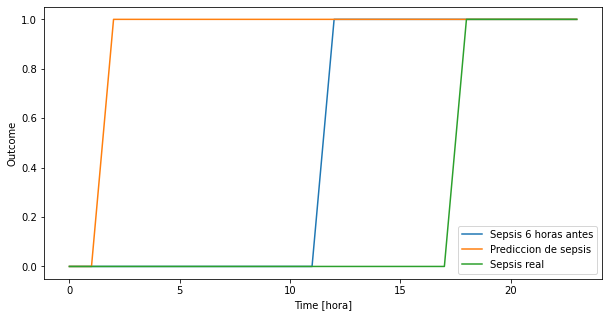

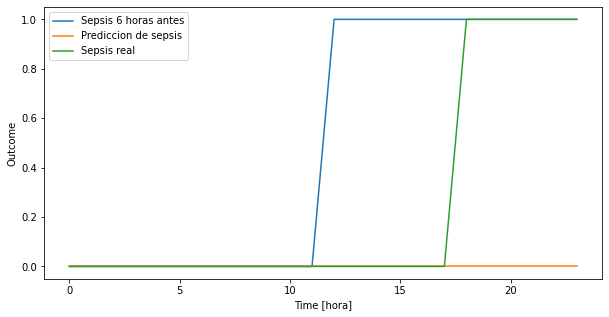

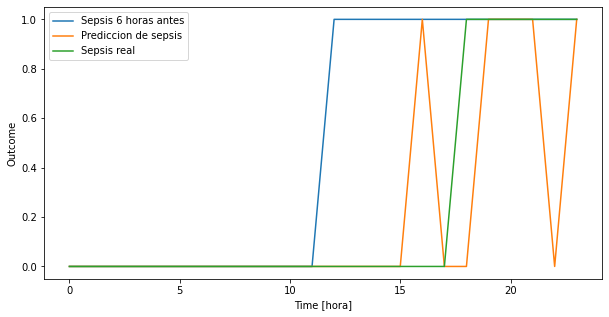

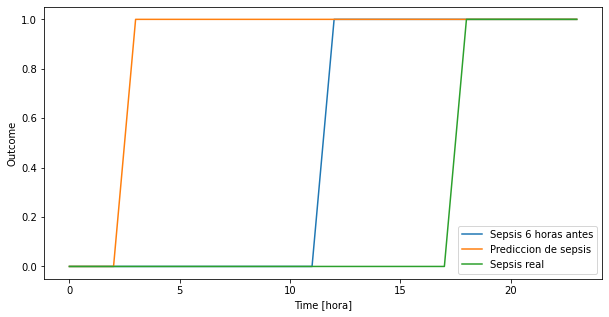

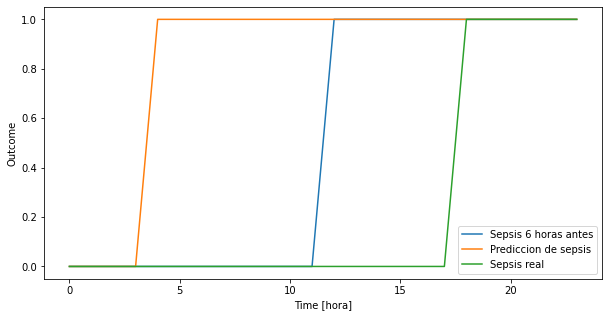

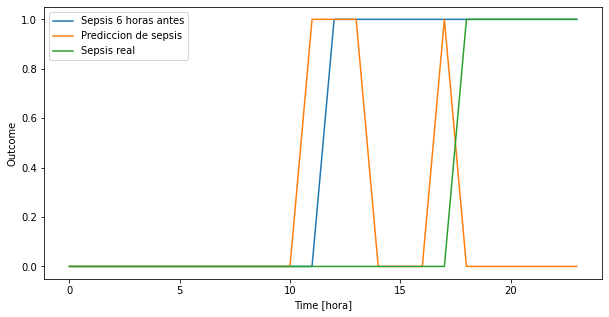

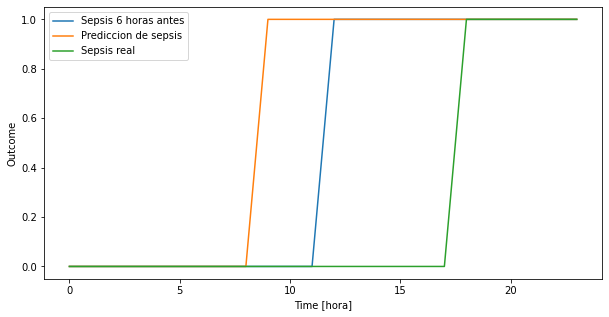

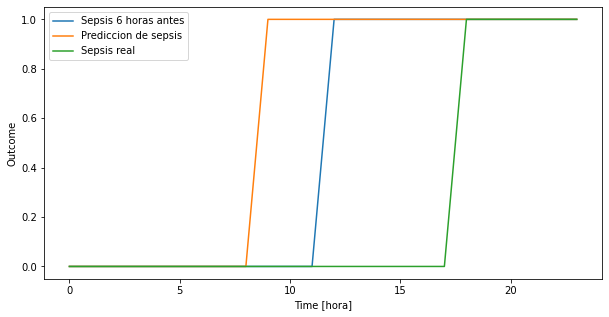

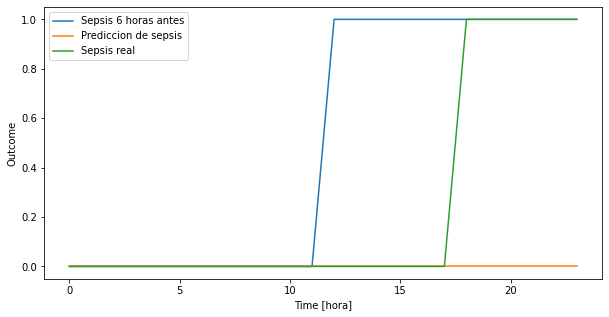

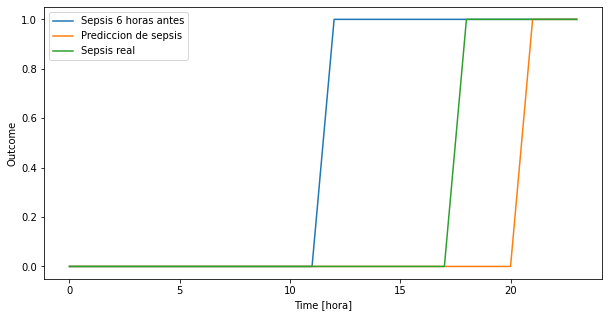

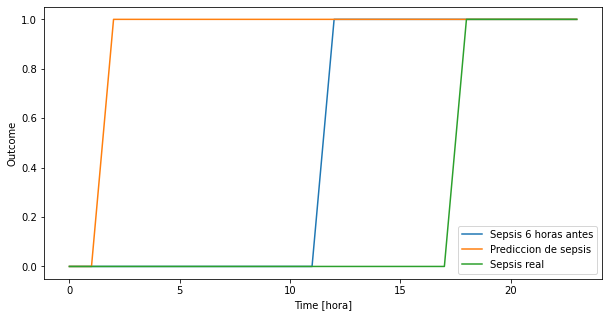

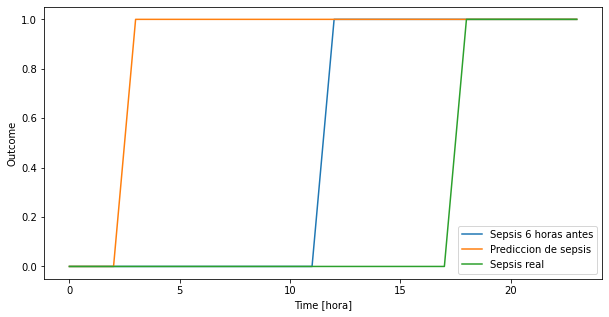

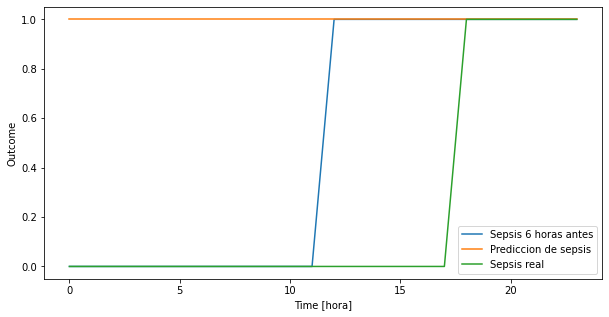

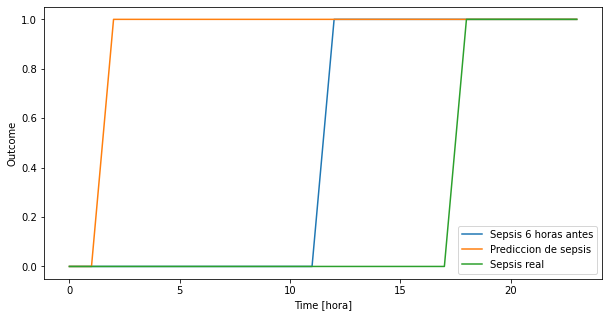

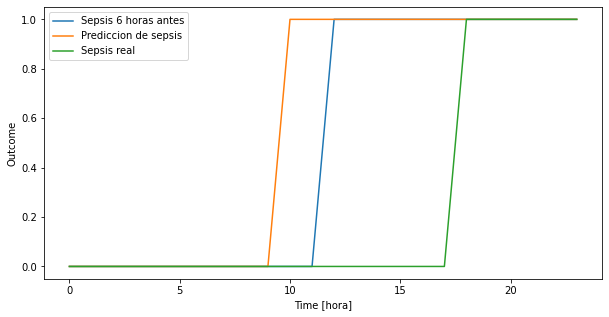

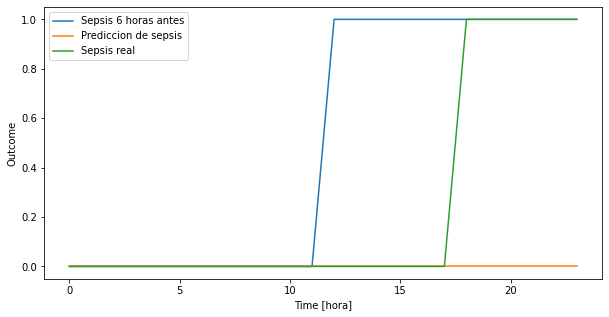

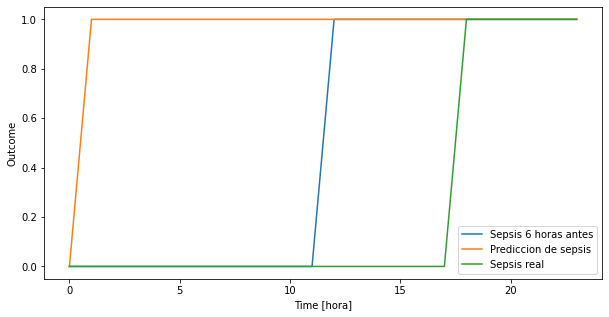

In [102]:
a=-24
b=0
for i in range(int(len(X_test_transformed)/24)):
    a+=24
    b+=24
    paciente_real=y_test[a:b]
    paciente_predicted=pred_model_svm[a:b]
    paciente_sepsis=Sepsis_test[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
    plt.plot(t,paciente_real, label="Sepsis 6 horas antes")
    plt.plot(t,paciente_predicted, label="Prediccion de sepsis")
    plt.plot(t,paciente_sepsis, label= "Sepsis real")
    plt.xlabel('Time [hora]')
    plt.ylabel('Outcome')
    plt.legend()

## **5. XgBoost**


### Búsqueda de alpha, col sample by tree, learning rate, max depth, alpha, n estimators

In [0]:
#NO EJECUTAR HA ESTADO 1 HORA APROX
param_grid = [{'colsample_bytree': [0.1, 0.5, 0.8], 'learning_rate': [0.001, 0.0001], 
               'max_depth': [3,6,9],'alpha':[0,1,5], 'n_estimators': [100,500, 1000]}]
model = GridSearchCV(xgb.XGBClassifier(objective ='reg:logistic'), param_grid, cv=KFold(n_splits=int(len(X_train_transformed)/24)), n_jobs=-1)
model.fit(X_train_transformed, y_train)
pred_model = model.predict(X_test_transformed)
params=model.best_params_
print(params)
#'alpha': 5, 'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 1000

C:\Users\Usuario\Anaconda3\envs\optimization\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\Anaconda3\envs\optimization\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Construcción de modelo

In [0]:
xg = xgb.XGBClassifier( objective ='reg:logistic', colsample_bytree=0.8,learning_rate=0.001,
               max_depth= 6, alpha= 5, n_estimators = 1000, n_jobs=-1)
eval_set = [(X_train_transformed, y_train), (X_test_transformed, y_test)]

xg.fit(X_train_transformed,y_train,eval_metric=["error", 'logloss'],eval_set=eval_set, early_stopping_rounds=15)
xg_pred = xg.predict(X_test_transformed) #salida blanda



[0]	validation_0-error:0.283951	validation_0-logloss:0.692845	validation_1-error:0.511574	validation_1-logloss:0.693171
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.090278	validation_0-logloss:0.692216	validation_1-error:0.347222	validation_1-logloss:0.692822
[2]	validation_0-error:0.080247	validation_0-logloss:0.69155	validation_1-error:0.319444	validation_1-logloss:0.692543
[3]	validation_0-error:0.075617	validation_0-logloss:0.691244	validation_1-error:0.372685	validation_1-logloss:0.692552
[4]	validation_0-error:0.08179	validation_0-logloss:0.690606	validation_1-error:0.333333	validation_1-logloss:0.692251
[5]	validation_0-error:0.068673	validation_0-logloss:0.689994	validation_1-error:0.333333	validation_1-logloss:0.692063
[6]	validation_0-error:0.066358	validation_0-logloss:0.689332	validation_1-error:0.363426	validation_1-logloss:0.6918

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.068673	validation_0-logloss:0.684433	validation_1-error:0.368056	validation_1-logloss:0.690564
[15]	validation_0-error:0.064815	validation_0-logloss:0.683838	validation_1-error:0.372685	validation_1-logloss:0.690343
[16]	validation_0-error:0.063272	validation_0-logloss:0.683171	validation_1-error:0.372685	validation_1-logloss:0.69011
[17]	validation_0-error:0.064043	validation_0-logloss:0.682876	validation_1-error:0.372685	validation_1-logloss:0.690114
[18]	validation_0-error:0.0625	validation_0-logloss:0.682349	validation_1-error:0.386574	validation_1-logloss:0.690165
[19]	validation_0-error:0.060957	validation_0-logloss:0.681684	validation_1-error:0.375	validation_1-logloss:0.689966
[20]	validation_0-error:0.060185	validation_0-logloss:0.681076	validation_1-error:0.375	validation_1-logloss:0.689766
[21]	validation_0-error:0.060957	validation_0-logloss:0.680429	validation_1-error:0.375	validation_1-logloss:0.689552
[22]	validation_0-error:0.059414	validation_

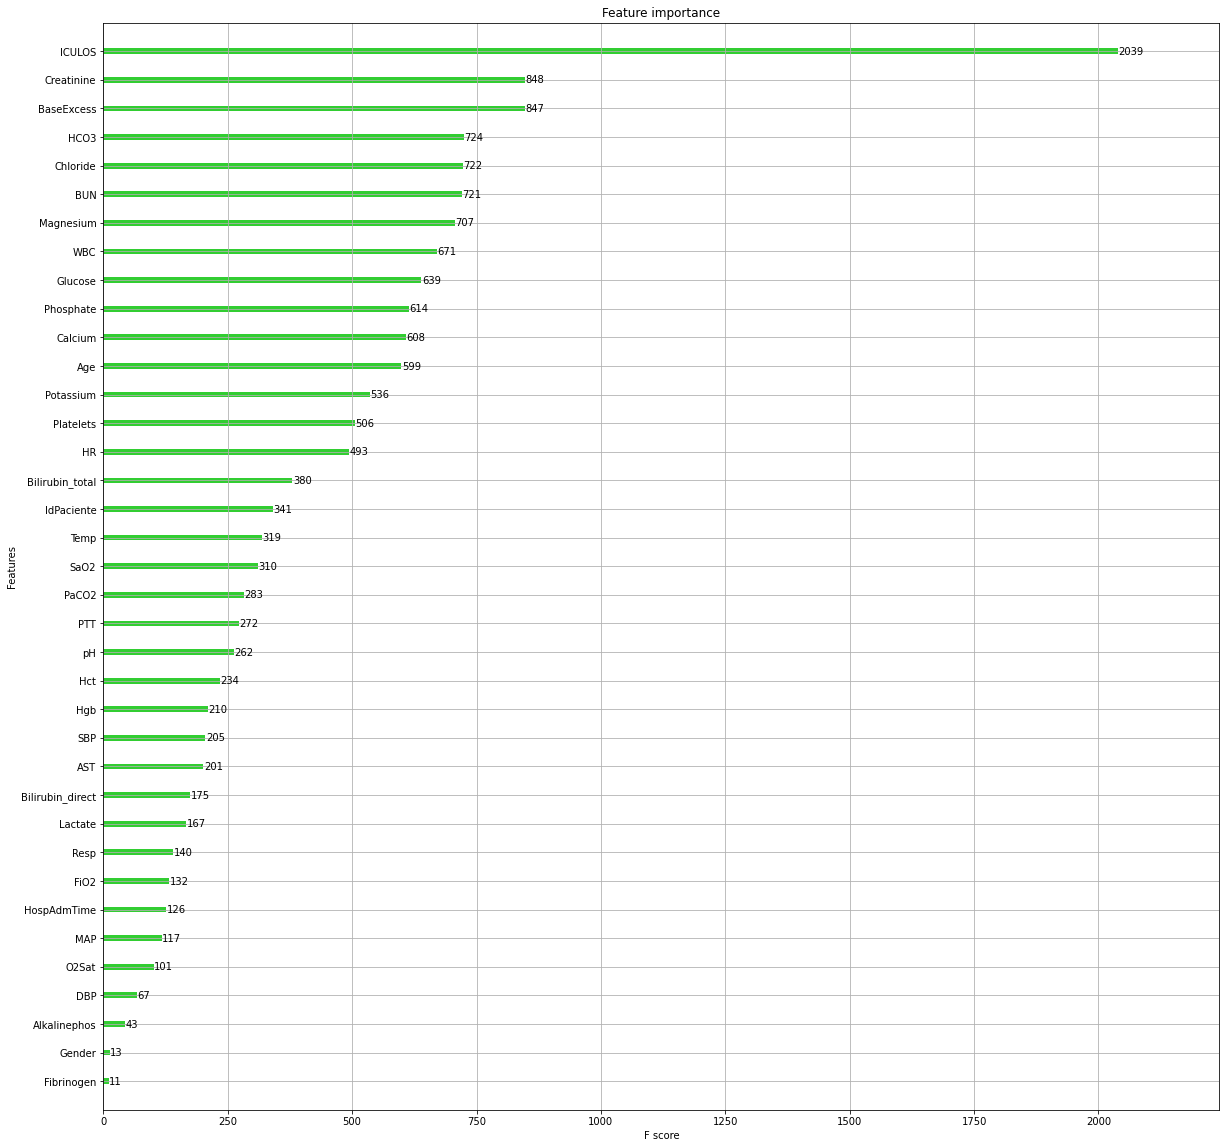

In [0]:
#IMPORTANCIA VARIABLES: counting the number of times each feature is split on across all boosting rounds (trees) 
xgb.plot_importance(xg, color='limegreen')
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [0]:
# retrieve performance metrics (esto no rula por ser python 2.5)
import matplotlib.pyplot as plt
results = xg.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train', color= 'limegreen')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test',color= 'cadetblue')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train', color= 'limegreen' )
ax.plot(x_axis, results['validation_1']['error'], label='Test', color= 'cadetblue' )
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Evaluación de prestaciones

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,xg_pred )
print(confusion_matrix)

[[156  60]
 [108 108]]


In [0]:
#Evaluamos las prestaciones de nuestro clasificador
VN, FP, FN, VP = confusion_matrix.ravel()

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP /(VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad del test es de:",specificity)

La tasa de acierto del test es de: 0.6111111111111112
La sensibilidad del test es de: 0.5
La especificidad del test es de: 0.7222222222222222


### Visualización del Outcome

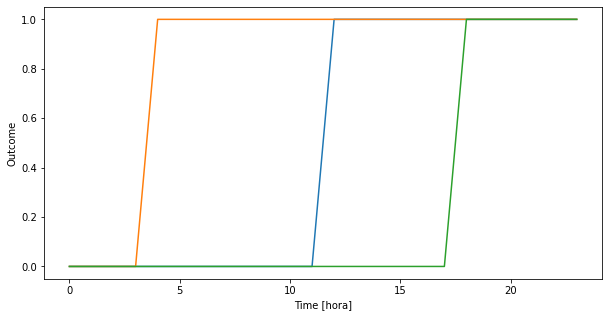

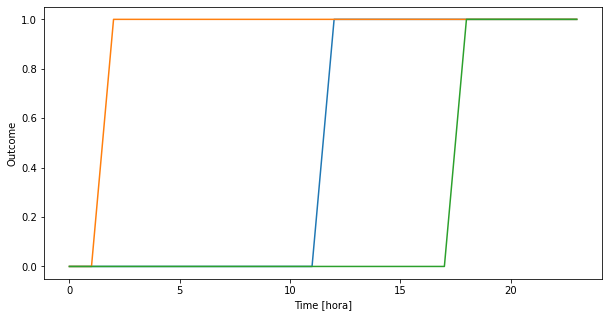

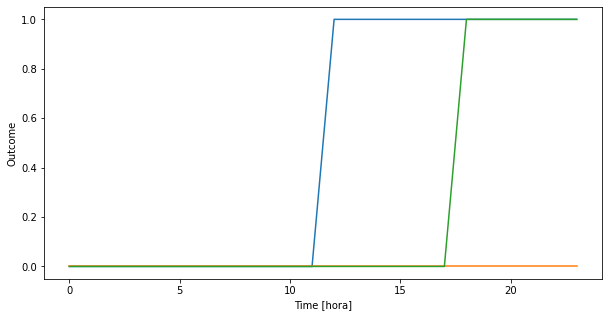

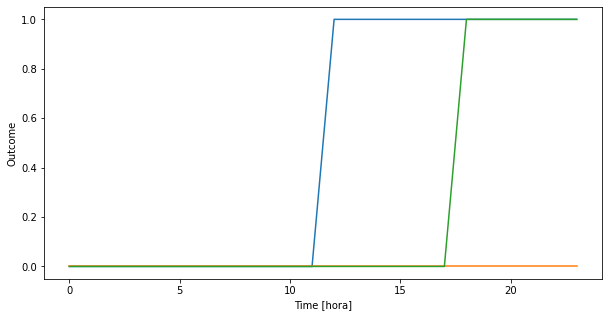

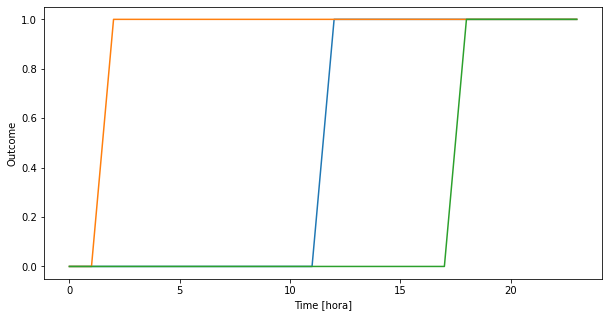

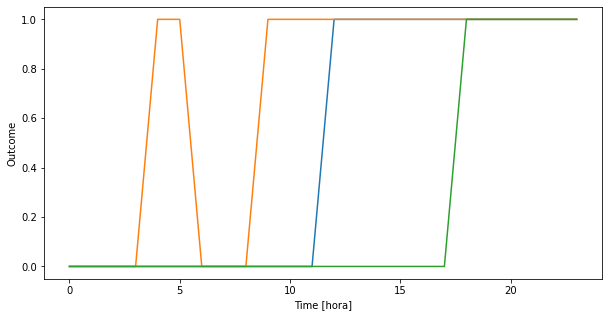

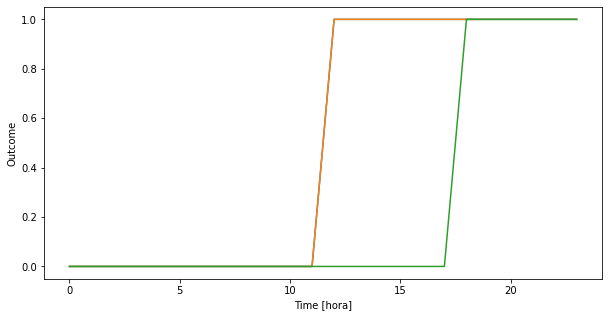

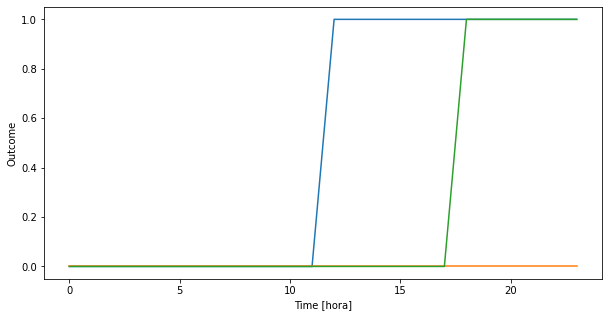

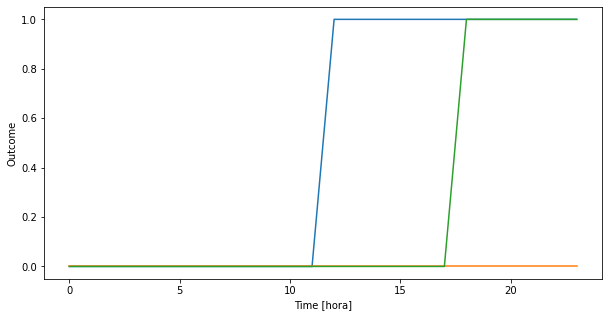

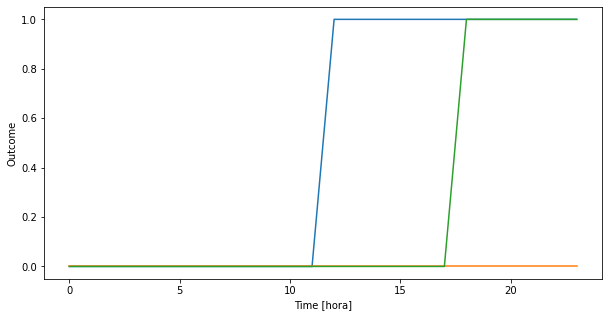

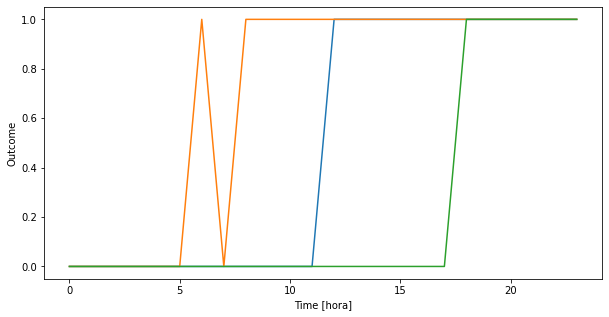

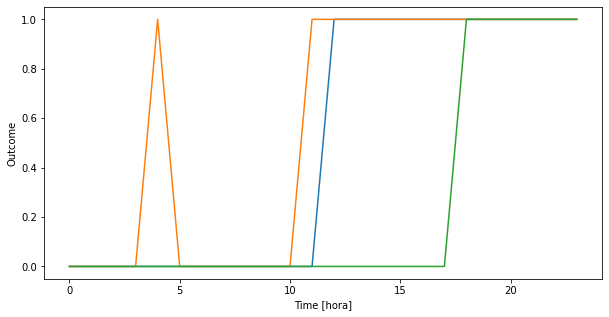

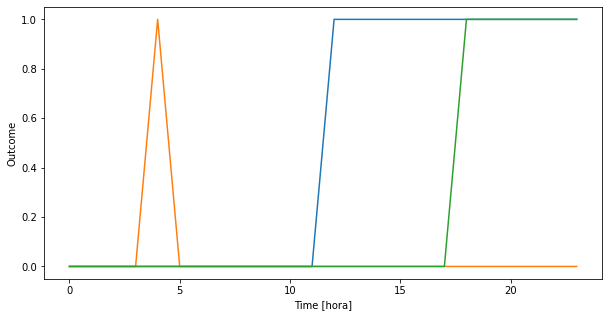

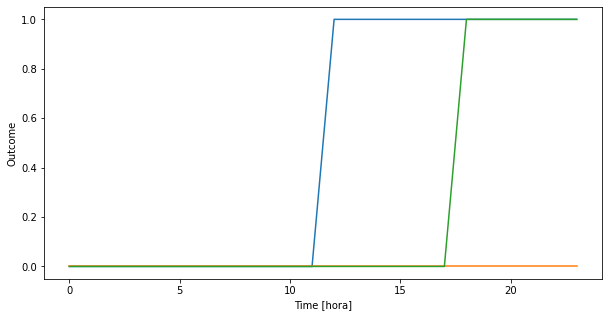

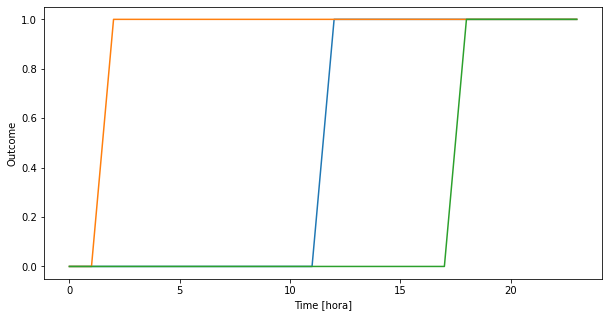

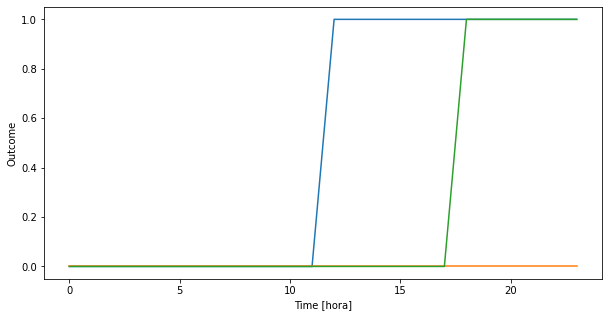

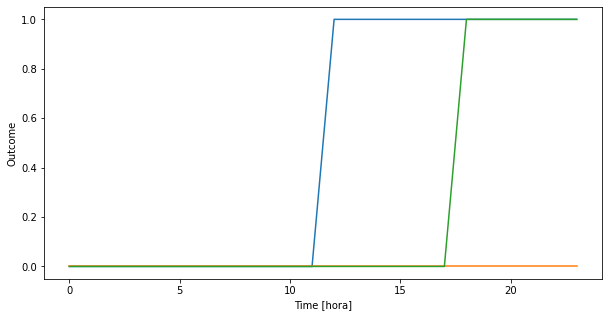

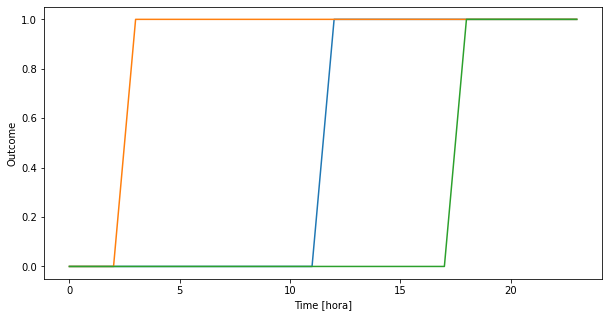

In [0]:
a=-24
b=0
for i in range(int(len(X_test_transformed)/24)):
    a+=24
    b+=24
    paciente_real=y_test[a:b]
    paciente_predicted=xg_pred[a:b]
    paciente_sepsis=Sepsis_test[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
  plt.plot(t,paciente_real, label="Sepsis 6 horas antes")
    plt.plot(t,paciente_predicted, label="Prediccion de sepsis")
    plt.plot(t,paciente_sepsis, label= "Sepsis real")
    plt.xlabel('Time [hora]')
    plt.ylabel('Outcome')
    plt.legend()